In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
from scipy.io import loadmat
from sklearn import svm

In [2]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

In [3]:
def plotData(X, y ,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)

In [4]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plotData(X, y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths=5)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011', '__version__': '1.0', '__globals__': [], 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  ,

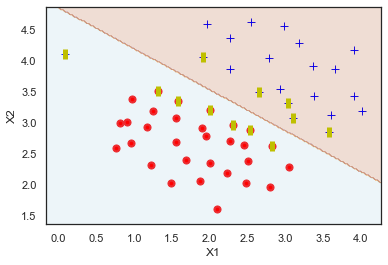

Number of support vectors:  12


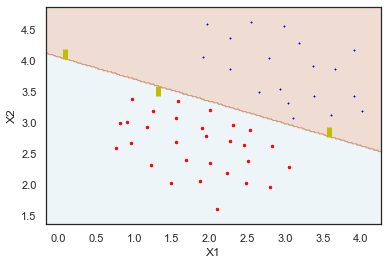

Number of support vectors:  3


In [5]:
# exapmle 1 , Linear SVM
data1 = loadmat('ex6data1.mat')
print(data1)
y1 = data1['y']
X1 = data1['X']
print('X1:', X1.shape)
print('y1:', y1.shape)
#data before classifying
plotData(X1,y1,50)
#small C == UF
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)
#big C == OF
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X2: (863, 2)
y2: (863, 1)


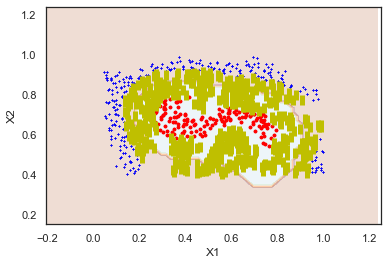

Number of support vectors:  456


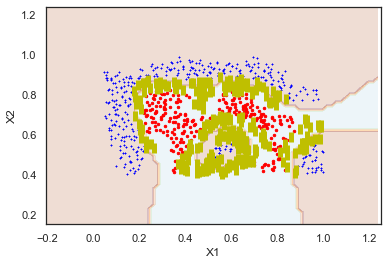

Number of support vectors:  254


In [6]:
# Example 2 : Nonlinear SVM
data2 = loadmat('ex6data2.mat')
print(data2.keys())
y2 = data2['y']
X2 = data2['X']
print('X2:', X2.shape)
print('y2:', y2.shape)

plotData(X2, y2,8)
#apply SVM
clf2 = svm.SVC(C=1, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)


clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

X3: (211, 2)
y3: (211, 1)


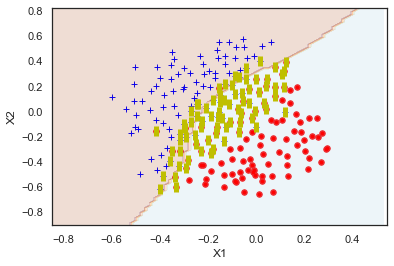

Number of support vectors:  78


In [7]:
# Example 3 : Nonlinear SVM
data3 = loadmat('ex6data3.mat')
#print(data3.keys())
y3 = data3['y']
X3 = data3['X']
print('X3:', X3.shape)
print('y3:', y3.shape)

plotData(X3, y3,30)

clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

In [8]:
# Training
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')
print(spam_train)
print(spam_test)

X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

print(X.shape, y.shape, Xtest.shape, ytest.shape)

svc = svm.SVC()
svc.fit(X, y)
# Testing
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'y': array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011', '__version__': '1.0', '__globals__': [], 'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'ytest': array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
     